# Sentiment Analysis Script 

In [21]:
# Author : Saksham Arora

In [16]:
import numpy as np 
import pandas as pd
# import praw 
import matplotlib.pyplot as plt 
import networkx as nx 
import time
import warnings

In [17]:
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 5)
warnings.filterwarnings('ignore')

### Install vaderSentiment package 

In [3]:
# install vaderSenttiment 
!pip install vaderSentiment

In [4]:
# import vaderSentiment library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### Read in Data

In [5]:
# read in data file 
berkeley_dtypes = {'id':'str', 'author':'str', 'score':'float', 'upvote_ratio':'float', 'num_comments':'int',
       'subreddit':'str', 'selftext':'str', 'comments':'object'}
berkeley_df = pd.read_csv('berkeley_top_337_new.csv', dtype=berkeley_dtypes, usecols=berkeley_dtypes.keys())

In [6]:
# read in data file 
berkeley_dtypes = {'id':'str', 'author':'str', 'score':'float', 'upvote_ratio':'float', 'num_comments':'int',
       'subreddit':'str', 'selftext':'str', 'comments':'object'}
cornell_df = pd.read_csv('cornell_top_307.csv', dtype=berkeley_dtypes, usecols=berkeley_dtypes.keys())
harvard_df = pd.read_csv('harvard_top_494.csv', dtype=berkeley_dtypes, usecols=berkeley_dtypes.keys())
cornell_df = pd.read_csv('cornell_top_307.csv', dtype=berkeley_dtypes, usecols=berkeley_dtypes.keys())
uiuc_df = pd.read_csv('uiuc_top_215.csv', dtype=berkeley_dtypes, usecols=berkeley_dtypes.keys())

In [7]:
berkeley_df['comments'] = berkeley_df['comments'].apply(lambda x: eval(x))
cornell_df['comments'] = cornell_df['comments'].apply(lambda x: eval(x))
harvard_df['comments'] = harvard_df['comments'].apply(lambda x: eval(x))
uiuc_df['comments'] = uiuc_df['comments'].apply(lambda x: eval(x))

### Compute post sentiment scores for all four subreddits

In [8]:
berkeley_df['post_sentiment_dict'] = berkeley_df['selftext'].apply(lambda sentence: analyzer.polarity_scores(sentence))

In [10]:
cornell_df['post_sentiment_dict'] = cornell_df['selftext'].apply(lambda sentence: analyzer.polarity_scores(sentence))

In [20]:
cornell_df[['selftext', 'post_sentiment_dict']].tail(5)

,selftext,post_sentiment_dict
302,"[The Greenest Pilgrim U'Know 🦃🥧🙏🏻 on Twitter: ""Ok, so apparently @jiadagod is a camgirl who's being targeted by some stalker, and doesn't have anything to do with the actual bomb threats. #wediditreddit #missionaccomplished"" / Twitter](https://twitter.com/GregoriRomanova/status/1457502696697745409)\n\n[\\""Carter Morgan\\"", most likely the fake \\""Jia Nakamura\\""](https://preview.redd.it/rvo9g26mu9y71.png?width=754&format=png&auto=webp&v=enabled&s=dc1e4feba5569b5b21f8bcece17e54837f3f6131)\n\nIn essence, some guy got mad that some e-girl didn't DM them, and instead of simply swatting them like how most of these stories end, they went a level up and called in bomb threats to numerous universities attaching their name to the threats, in an attempt to frame her?\n\n&#x200B;\n\n&#x200B;\n\nhttps://preview.redd.it/8z34pcbqu9y71.png?width=741&format=png&auto=webp&v=enabled&s=1cd7522031bcd2b1c1ed6a0e15e7b13255edee14\n\n&#x200B;\n\nhttps://preview.redd.it/jmt9qxfsu9y71.png?width=693&format=png&auto=webp&v=enabled&s=aef4ff36c290670a133d6d1a55ad00ac23c69786\n\n&#x200B;\n\nhttps://preview.redd.it/l9yosbmru9y71.png?width=678&format=png&auto=webp&v=enabled&s=087eb71cedb2e6b9ecddbd1ba223d6432602127d","{'neg': 0.182, 'neu': 0.798, 'pos': 0.02, 'compound': -0.9629}"
303,Is it really stealing if he was on the Unlimited meal plan??? /s\n\nWhat is up with this freshman class tho,"{'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'compound': -0.6739}"
304,"I was coming out of teagle and I spotted this bright yellow, almost blinding, object in the sky. It was spotted at approximately 1:34 PM Sunday December 2nd 2018. It made me feel warm (something I haven't felt in years) and made the environment around me brighter. Someone called it his ""son,"" but idk how a child can get up in the sky. Also it seems to be moving from east to west. Anyone know what it is?\n\nEDIT: MY FIRST GOLD. It's almost as bright as whatever was in the sky","{'neg': 0.016, 'neu': 0.893, 'pos': 0.091, 'compound': 0.7407}"
305,fuck,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5423}"
306,"COVID. He was in the ICU for two weeks. He said he was proud of me for achieving my dreams (of getting into school) and as soon as he got out, he was going to come and visit me. My other uncle (on my mom's side) died in December, two days before I was accepted - also of COVID. I don't know what to do now. Should I go home and go to his funeral? Should I stay here and not make my family worry about having to pay to fly me back home and back to Ithaca? Should I tell my friends that I've only known for two weeks? I don't know. \n\nJust wear your mask. No matter how annoying you might think it is.","{'neg': 0.104, 'neu': 0.819, 'pos': 0.078, 'compound': -0.4047}"


In [9]:
harvard_df['post_sentiment_dict'] = harvard_df['selftext'].apply(lambda sentence: analyzer.polarity_scores(sentence))

In [10]:
uiuc_df['post_sentiment_dict'] = uiuc_df['selftext'].apply(lambda sentence: analyzer.polarity_scores(sentence))

### Compute comment sentiment for all four subreddits

In [10]:
# helper function to compute comment sentiment
def compute_comment_sentiment(comment_list):
    res_list = []
    for comment_dict in comment_list:
        res_list.append(analyzer.polarity_scores(comment_dict['body']))
        
    return res_list

In [11]:
%%time 
berkeley_df['comment_sentiment_list'] = berkeley_df['comments'].apply(lambda comment_list: compute_comment_sentiment(comment_list))
cornell_df['comment_sentiment_list'] = cornell_df['comments'].apply(lambda comment_list: compute_comment_sentiment(comment_list))
harvard_df['comment_sentiment_list'] = harvard_df['comments'].apply(lambda comment_list: compute_comment_sentiment(comment_list))
uiuc_df['comment_sentiment_list'] = uiuc_df['comments'].apply(lambda comment_list: compute_comment_sentiment(comment_list))

CPU times: user 8.2 s, sys: 33.3 ms, total: 8.23 s
Wall time: 8.28 s


### Aggregate comment sentiment for each poster 

In [12]:
def compute_aggregate_comment_sentiment(comment_sentiment_list, type_flag):
    res = 0 
    for item in comment_sentiment_list:
        res += item[type_flag] 

    return res
        

In [13]:
berkeley_df['agg_pos_comment_sentiment'] = berkeley_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment(x, 'pos'))
berkeley_df['agg_compound_comment_sentiment'] = berkeley_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment(x, 'compound'))
berkeley_df['agg_neg_comment_sentiment'] = berkeley_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment(x, 'neg'))

In [14]:
cornell_df['agg_pos_comment_sentiment'] = cornell_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment(x, 'pos'))
cornell_df['agg_compound_comment_sentiment'] = cornell_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment(x, 'compound'))
cornell_df['agg_neg_comment_sentiment'] = cornell_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment(x, 'neg'))

In [15]:
harvard_df['agg_pos_comment_sentiment'] = harvard_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment(x, 'pos'))
harvard_df['agg_compound_comment_sentiment'] = harvard_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment(x, 'compound'))
harvard_df['agg_neg_comment_sentiment'] = harvard_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment(x, 'neg'))

In [16]:
uiuc_df['agg_pos_comment_sentiment'] = uiuc_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment(x, 'pos'))
uiuc_df['agg_compound_comment_sentiment'] = uiuc_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment(x, 'compound'))
uiuc_df['agg_neg_comment_sentiment'] = uiuc_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment(x, 'neg'))

In [17]:
def compute_aggregate_comment_sentiment_average(comment_sentiment_list, type_flag):
    res = 0 
    for item in comment_sentiment_list:
        res += item[type_flag] 

    return res/len(comment_sentiment_list)

In [11]:
berkeley_df['agg_pos_comment_sentiment_avg'] = berkeley_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment_average(x, 'pos'))
berkeley_df['agg_compound_comment_sentiment_avg'] = berkeley_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment_average(x, 'compound'))
berkeley_df['agg_neg_comment_sentiment_avg'] = berkeley_df['comment_sentiment_list'].apply(lambda x: compute_aggregate_comment_sentiment_average(x, 'neg'))

In [55]:
# berkeley_df = berkeley_df.drop(['aggregated_negative_comment'], axis = 1)

In [11]:
berkeley_df['post_pos_sentiment'] = berkeley_df['post_sentiment_dict'].apply(lambda x: x['pos'])
berkeley_df['post_neg_sentiment'] = berkeley_df['post_sentiment_dict'].apply(lambda x: x['neg'])
berkeley_df['post_compound_sentiment'] = berkeley_df['post_sentiment_dict'].apply(lambda x: x['compound'])

In [12]:
cornell_df['post_pos_sentiment'] = cornell_df['post_sentiment_dict'].apply(lambda x: x['pos'])
cornell_df['post_neg_sentiment'] = cornell_df['post_sentiment_dict'].apply(lambda x: x['neg'])
cornell_df['post_compound_sentiment'] = cornell_df['post_sentiment_dict'].apply(lambda x: x['compound'])

In [13]:
harvard_df['post_pos_sentiment'] = harvard_df['post_sentiment_dict'].apply(lambda x: x['pos'])
harvard_df['post_neg_sentiment'] = harvard_df['post_sentiment_dict'].apply(lambda x: x['neg'])
harvard_df['post_compound_sentiment'] = harvard_df['post_sentiment_dict'].apply(lambda x: x['compound'])

In [14]:
uiuc_df['post_pos_sentiment'] = uiuc_df['post_sentiment_dict'].apply(lambda x: x['pos'])
uiuc_df['post_neg_sentiment'] = uiuc_df['post_sentiment_dict'].apply(lambda x: x['neg'])
uiuc_df['post_compound_sentiment'] = uiuc_df['post_sentiment_dict'].apply(lambda x: x['compound'])

In [14]:
berkeley_df

,id,author,score,upvote_ratio,num_comments,subreddit,selftext,comments,post_sentiment_dict,comment_sentiment_list,agg_pos_comment_sentiment,agg_compound_comment_sentiment,agg_neg_comment_sentiment,agg_pos_comment_sentiment_avg,agg_compound_comment_sentiment_avg,agg_neg_comment_sentiment_avg,post_pos_sentiment,post_neg_sentiment,post_compound_sentiment
0,jryusf,yoyoyaass,374.0,0.97,43,berkeley,😙✌️ who else feels?,"[{'author': 'buckyspunisher', 'body': 'Haha ye...","{'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'comp...","[{'neg': 0.282, 'neu': 0.483, 'pos': 0.235, 'c...",10.292,11.8611,4.127,0.223739,0.257850,0.089717,0.456,0.000,0.7717
1,12825pi,yogurtchicken21,434.0,0.99,29,berkeley,Not my picture,"[{'author': 'compstomper1', 'body': 'or flying...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",3.175,5.0289,1.179,0.113393,0.179604,0.042107,0.000,0.000,0.0000
2,p88cbe,ylc217,417.0,0.82,137,berkeley,I’m probably going to get downvoted for this b...,"[{'author': 'BrainyCardinal45', 'body': '@Deba...","{'neg': 0.041, 'neu': 0.705, 'pos': 0.254, 'co...","[{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'com...",14.053,3.0333,10.777,0.097590,0.021065,0.074840,0.254,0.041,0.9933
3,10ygfry,yapoyt,411.0,0.95,74,berkeley,I just got into Cal early with a regents and c...,"[{'author': 'Money_Equivalent6439', 'body': 'A...","{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...","[{'neg': 0.186, 'neu': 0.571, 'pos': 0.243, 'c...",22.455,26.9142,3.480,0.311875,0.373808,0.048333,0.213,0.000,0.9500
4,wgjc64,xosarasparklesxo,371.0,0.99,41,berkeley,"I hopped on AC 52 on Bancroft, headed away fro...","[{'author': 'Important_Ad_3688', 'body': 'This...","{'neg': 0.074, 'neu': 0.91, 'pos': 0.016, 'com...","[{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'com...",5.516,2.1721,4.100,0.134537,0.052978,0.100000,0.016,0.074,-0.8477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,pbqj3b,712588Kf,342.0,0.99,24,berkeley,I couldn’t afford to pay the $130 for my Chem ...,"[{'author': 'sunoosupremacy', 'body': 'that is...","{'neg': 0.067, 'neu': 0.834, 'pos': 0.099, 'co...","[{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'com...",9.061,13.8448,0.655,0.393957,0.601948,0.028478,0.099,0.067,0.4795
334,p0tx3l,712588Kf,341.0,0.97,21,berkeley,I can’t wait for me to be living in my apartme...,"[{'author': 'PotentiallyExplosive', 'body': 'i...","{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...","[{'neg': 0.312, 'neu': 0.688, 'pos': 0.0, 'com...",4.023,5.9056,1.281,0.201150,0.295280,0.064050,0.073,0.000,0.6956
335,prcxvy,712588Kf,333.0,0.98,20,berkeley,This means a lot to me considering I was a rea...,"[{'author': 'LugnutsK', 'body': 'B for Berkele...","{'neg': 0.071, 'neu': 0.929, 'pos': 0.0, 'comp...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",7.309,9.0280,0.618,0.348048,0.429905,0.029429,0.000,0.071,-0.2831
336,gi3j9s,31makeitmakesense,639.0,0.93,185,berkeley,"This year, Berkeley's [top graduate](https://n...","[{'author': 'gotransfersgobears', 'body': 'The...","{'neg': 0.048, 'neu': 0.861, 'pos': 0.091, 'co...","[{'neg': 0.082, 'neu': 0.791, 'pos': 0.126, 'c...",30.264,52.3311,15.007,0.157625,0.272558,0.078161,0.091,0.048,0.8948


### Save data 

In [15]:
berkeley_df.to_csv('data/berkeley_sentiment_new.csv')

In [16]:
cornell_df.to_csv('data/cornell_sentiment_new.csv')

In [17]:
harvard_df.to_csv('data/harvard_sentiment_new.csv')

In [18]:
uiuc_df.to_csv('data/uiuc_sentiment_new.csv')

### Compute Sentiment Class 

In [18]:
berkeley_exploded_df = berkeley_df.explode(['comment_sentiment_list', 'comments'])
cornell_exploded_df = cornell_df.explode(['comment_sentiment_list', 'comments'])
harvard_exploded_df = harvard_df.explode(['comment_sentiment_list', 'comments'])
uiuc_exploded_df = uiuc_df.explode(['comment_sentiment_list', 'comments'])

In [19]:
berkeley_exploded_df = berkeley_exploded_df.rename(columns={'comment_sentiment_list':'comment_sentiment_dict', 'comments':'comment'})
cornell_exploded_df = cornell_exploded_df.rename(columns={'comment_sentiment_list':'comment_sentiment_dict', 'comments':'comment'})
harvard_exploded_df = harvard_exploded_df.rename(columns={'comment_sentiment_list':'comment_sentiment_dict', 'comments':'comment'})
uiuc_exploded_df = uiuc_exploded_df.rename(columns={'comment_sentiment_list':'comment_sentiment_dict', 'comments':'comment'})

In [20]:
def compute_comment_sentiment_class(comment_sentiment):
    if -1 <= comment_sentiment['compound'] < -0.65:
        return 'VN'
    elif -0.65 <= comment_sentiment['compound'] < -0.35:
        return 'N'
    elif -0.35 <= comment_sentiment['compound'] < 0.35:
        return 'NEU'
    elif 0.35 <= comment_sentiment['compound'] < 0.65:
        return 'P'
    elif 0.65 <= comment_sentiment['compound'] <= 1:
        return 'VP'

In [21]:
berkeley_exploded_df['comment_sentiment_class'] = berkeley_exploded_df['comment_sentiment_dict'].apply(lambda x: compute_comment_sentiment_class(x))
cornell_exploded_df['comment_sentiment_class'] = cornell_exploded_df['comment_sentiment_dict'].apply(lambda x: compute_comment_sentiment_class(x))
harvard_exploded_df['comment_sentiment_class'] = harvard_exploded_df['comment_sentiment_dict'].apply(lambda x: compute_comment_sentiment_class(x))
uiuc_exploded_df['comment_sentiment_class'] = uiuc_exploded_df['comment_sentiment_dict'].apply(lambda x: compute_comment_sentiment_class(x))

In [35]:
berkeley_exploded_df.to_csv('data/berkeley_comment_sentiment_class.csv')

In [22]:
cornell_exploded_df.to_csv('data/cornell_comment_sentiment_class.csv')
harvard_exploded_df.to_csv('data/harvard_comment_sentiment_class.csv')
uiuc_exploded_df.to_csv('data/uiuc_comment_sentiment_class.csv')

In [50]:
berkeley_exploded_df.columns

Index(['id', 'author', 'score', 'upvote_ratio', 'num_comments', 'subreddit',
       'selftext', 'comment', 'post_sentiment_dict', 'comment_sentiment_dict',
       'comment_sentiment_class'],
      dtype='object')

In [33]:
# compute weighted comment score for each post by aggregating comment classes 
berkeley_grouped_df = berkeley_exploded_df.groupby(['id', 'author', 'score', 'upvote_ratio', 'num_comments', 'subreddit',
       'selftext']).agg(list).reset_index()

In [23]:
# compute weighted comment score for each post by aggregating comment classes 
cornell_grouped_df = cornell_exploded_df.groupby(['id', 'author', 'score', 'upvote_ratio', 'num_comments', 'subreddit',
       'selftext']).agg(list).reset_index()

In [24]:
# compute weighted comment score for each post by aggregating comment classes 
harvard_grouped_df = harvard_exploded_df.groupby(['id', 'author', 'score', 'upvote_ratio', 'num_comments', 'subreddit',
       'selftext']).agg(list).reset_index()

In [25]:
# compute weighted comment score for each post by aggregating comment classes 
uiuc_grouped_df = uiuc_exploded_df.groupby(['id', 'author', 'score', 'upvote_ratio', 'num_comments', 'subreddit',
       'selftext']).agg(list).reset_index()

In [41]:
berkeley_grouped_df.columns

Index(['id', 'author', 'score', 'upvote_ratio', 'num_comments', 'subreddit',
       'selftext', 'comment', 'post_sentiment_dict', 'comment_sentiment_dict',
       'comment_sentiment_class'],
      dtype='object')

In [27]:
def compute_weighted_comment_class_sentiment(comment_class_list):
    score = 0
    for com_class in comment_class_list:
        if com_class == 'VN':
            score -= 1
        elif com_class == 'N':
            score -= 0.5 
        elif com_class == 'P':
            score += 0.25 
        elif com_class == 'VP':
            score += 0.5 
            
    return score 

In [34]:
berkeley_grouped_df['aggregated_comment_class_sentiment'] = berkeley_grouped_df['comment_sentiment_class'].apply(lambda x : compute_weighted_comment_class_sentiment(x))

In [28]:
cornell_grouped_df['aggregated_comment_class_sentiment'] = cornell_grouped_df['comment_sentiment_class'].apply(lambda x : compute_weighted_comment_class_sentiment(x))

In [29]:
harvard_grouped_df['aggregated_comment_class_sentiment'] = harvard_grouped_df['comment_sentiment_class'].apply(lambda x : compute_weighted_comment_class_sentiment(x))

In [30]:
uiuc_grouped_df['aggregated_comment_class_sentiment'] = uiuc_grouped_df['comment_sentiment_class'].apply(lambda x : compute_weighted_comment_class_sentiment(x))

In [35]:
berkeley_grouped_df.to_csv('data/berkeley_aggregated_comment_class_sentiment.csv')

In [31]:
cornell_grouped_df.to_csv('data/cornell_aggregated_comment_class_sentiment.csv')
harvard_grouped_df.to_csv('data/harvard_aggregated_comment_class_sentiment.csv')
uiuc_grouped_df.to_csv('data/uiuc_aggregated_comment_class_sentiment.csv')

<Axes: ylabel='Density'>

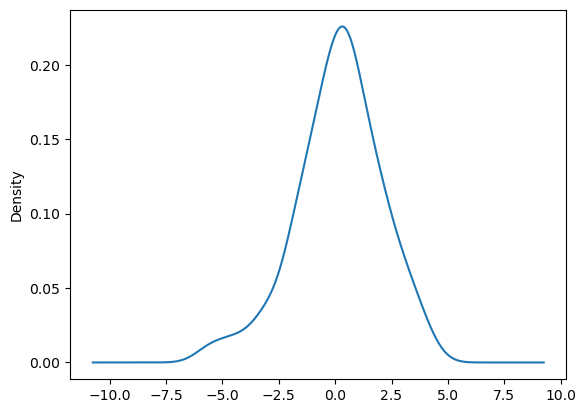

In [40]:
uiuc_grouped_df['aggregated_comment_class_sentiment'].plot(kind='kde')

<Axes: ylabel='Density'>

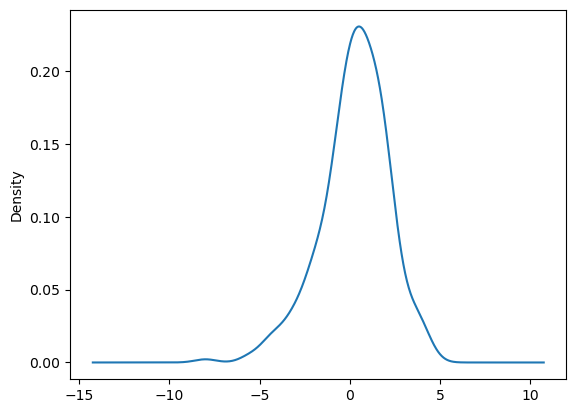

In [39]:
cornell_grouped_df['aggregated_comment_class_sentiment'].plot(kind='kde')

<Axes: ylabel='Density'>

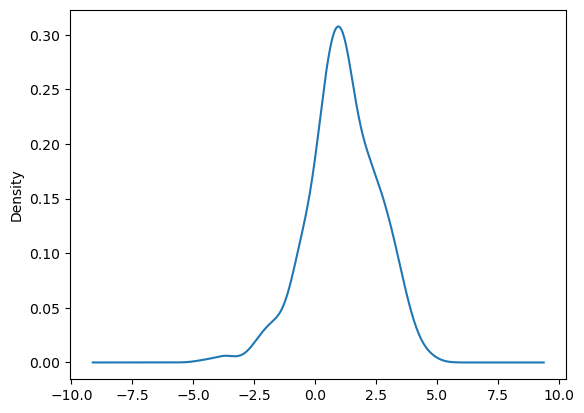

In [38]:
harvard_grouped_df['aggregated_comment_class_sentiment'].plot(kind='kde')

In [51]:
berkeley_grouped_df.columns

Index(['id', 'author', 'score', 'upvote_ratio', 'num_comments', 'subreddit',
       'selftext', 'comment', 'post_sentiment_dict', 'comment_sentiment_dict',
       'comment_sentiment_class', 'aggregated_comment_class_sentiment'],
      dtype='object')